# 1 数据说明

## 1.1 数据表表述

table1_user 训练集中应聘者的信息

table2_jd 训练集中工作的信息

table3_action 训练集中用户对工作的行为

test_user 测试集中的应聘者信息

test_action 测试集中应聘者行为

## 1.2 数据表中字段说明

### 1.2.1 train_user

<table>
<tr><td>user_id</td><td>用户标识</td><td>object</td>
<tr><td>live_city_id</td><td>现居住城市</td><td>int16</td>
<tr><td>desire_jd_city_id</td><td>期望工作城市</td><td>object</td>
<tr><td>desire_jd_industry_id</td><td>期望工作行业</td><td>object</td>
<tr><td>desire_jd_type_id</td><td>期望工作职类</td><td>object</td>
<tr><td>desire_jd_salary_id</td><td>期望薪水</td><td>object</td>
<tr><td>cur_industry_id</td><td>最近工作行业</td><td>object</td>
<tr><td>cur_jd_type</td><td>最近工作职类</td><td>object</td>
<tr><td>cur_salary_id</td><td>最近薪水</td><td>object</td>
<tr><td>cur_degree_id</td><td>学历</td><td>object</td>
<tr><td>birthday</td><td>年龄（虚拟年龄）</td><td>int16</td>
<tr><td>start_work_date</td><td>开始工作日期</td><td>object</td>
<tr><td>experience</td><td>经验</td><td>object</td>
</table>

### 1.2.2 train_job

<table>
<tr><td>jd_no</td><td>职位代码</td><td>object</td>
<tr><td>jd_title</td><td>职位标题</td><td>object</td>
<tr><td>company_name</td><td>公司（所有行均为空）</td><td>object</td>
<tr><td>city</td><td>城市</td><td>int16</td>
<tr><td>jd_sub_type</td><td>职位子类</td><td>object</td>
<tr><td>require_nums</td><td>需求人数</td><td>int16</td>
<tr><td>max_salary</td><td>最高月薪</td><td>int32</td>
<tr><td>min_salary</td><td>最低月薪</td><td>int32</td>
<tr><td>start_date</td><td>开始日期</td><td>object</td>
<tr><td>end_date</td><td>结束日期</td><td>object</td>
<tr><td>is_travel</td><td>是否要出差</td><td>int16</td>
<tr><td>min_years</td><td>工作年限</td><td>int16</td>
<tr><td>key</td><td>关键字</td><td>object</td>
<tr><td>min_edu_level</td><td>最低学历</td><td>object</td>
<tr><td>max_edu_level</td><td>最高学历</td><td>object</td>
<tr><td>is_mangerial</td><td>是否要求管理经验</td><td>object</td>
<tr><td>resume_language_required</td><td>语言需求</td><td>object</td>
<tr><td>job_description</td><td>职位描述</td><td>object</td>
</table>

### 1.2.3 train_action

<table>
<tr><td>user_id</td><td>用户标示</td><td>object</td>
<tr><td>jd_no</td><td>职位代码</td><td>object</td>
<tr><td>browsed</td><td>是否浏览</td><td>int16</td>
<tr><td>delivered</td><td>是否投递</td><td>int16</td>
<tr><td>satisfied</td><td>HR是否认可</td><td>int16</td>
</table>


## 1.3 数据集关系

In [86]:
#Load data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

data_path = '/Users/fan/PycharmProjects/tianchi/zhilian/data/'
raw_user_dtype = {'live_city_id': np.int16, 'desire_jd_salary_id': object, 'cur_salary_id': object, 'birthday': np.int16,
                      'start_work_date': object, }
raw_user = pd.read_csv(data_path + 'table1_user', delimiter='\t', error_bad_lines=False, dtype=raw_user_dtype)
#load train_job
raw_job_dtype = {'city': np.int16, 'require_nums': np.int16, 'max_salary': np.int32, 'min_salary': np.int32,
                 'start_date': object, 'end_date': object, 'raw_job': np.int16, 'is_travel': np.int16,
                 'min_years': np.int16, }
raw_job = pd.read_csv(data_path + 'table2_jd', delimiter='\t', error_bad_lines=False, dtype=raw_job_dtype)
#load train_action
raw_action_dtype = {'browsed': np.int16, 'delivered': np.int16, 'satisfied': np.int16}
raw_action = pd.read_csv(data_path + 'table3_action', delimiter='\t', error_bad_lines=False, dtype=raw_action_dtype)
#load test_user
test_user_dtype = {'live_city_id': np.int16, 'desire_jd_salary_id': object, 'cur_salary_id': object, 'birthday': np.int16,
                   'start_work_date': object}
test_user = pd.read_csv(data_path + "user_ToBePredicted", delimiter="\t", error_bad_lines=False, dtype=test_user_dtype)
#load test_action
test_action = pd.read_csv(data_path + "zhaopin_round1_user_exposure_A_20190723", delim_whitespace=True)

Skipping line 173315: expected 18 fields, saw 20



In [2]:
train_user_id = set(raw_user['user_id'])
test_user_id = set(test_user['user_id'])
user_test_not_in_train = test_user_id - train_user_id
print '训练集应聘人数%d, 测试集应聘人数%d，测试集中没有在训练集中出现过的人数%d' %(len(train_user_id), len(test_user_id), len(user_test_not_in_train))
train_job_no = set(raw_job['jd_no'])
test_job_no = set(test_action['jd_no'])
job_test_not_in_train = test_job_no - train_job_no
print '训练集职位数%d, 测试集职位数%d，测试集中没有在训练集中出现过的职位数%d, 占比%f' %(len(train_job_no), len(test_job_no), len(job_test_not_in_train),len(job_test_not_in_train)/(len(test_job_no)+0.0))

训练集应聘人数4500, 测试集应聘人数500，测试集中没有在训练集中出现过的人数500
训练集职位数265690, 测试集职位数24544，测试集中没有在训练集中出现过的职位数2003, 占比0.081609


### 1.3.1 应聘者情况

由上面结果可见，测试集中的500名测试者，均未在训练集中出现过，当然，这也是意料之中的。

### 1.3.1 职位情况

训练集中职位由26.6万条，在需要排序的测试机中，由2003条职位没有在训练集中出现过。



# 2 数据探索

## 2.1 train_user 

In [3]:
print "train_user 共有 %d条记录， %d列。" %(raw_user.shape[0], raw_user.shape[1])

train_user 共有 4500条记录， 13列。


In [4]:
# Function to data exploration and deal with missing data
def explory_cate_data(data, col_name, show_min_count=10):
    print 'Dtype of %s is %s and number of categoris is %d' % \
          (col_name, data[col_name].dtype, len(data[col_name].unique()))
    print 'Category of %s are:' % col_name
    cate = data[col_name].unique()
    cate.sort()
    print cate
    print 'Count of every category'
    cate_count = data.groupby(col_name)[[col_name]].count()
    cate_count.columns = ['count']
    cate_count['perc'] = cate_count['count']/(cate_count['count'].sum()+0.0)
    cate_count.sort_values('count', ascending=False, inplace=True)
    print cate_count[cate_count['count'] >= show_min_count]
    return cate_count


### 2.1.1 live_city_id

由结果看，live_city中共有240个城市（其中，由一个应聘者的城市id为0，可能为缺失值），求职者主要集中在几个大城市。

从这个表中，也可以挖掘不同城市之间的距离关系（用聚类？），一个应聘者可能会考虑和首选城市邻近的城市的工作。


Dtype of live_city_id is int16 and number of categoris is 240
Category of live_city_id are:
[    0   480   530   531   533   534   535   536   538   539   540   542
   545   546   547   548   550   551   552   553   565   566   567   568
   569   570   571   572   573   574   575   576   577   578   579   580
   582   583   584   585   586   587   588   590   592   593   596   599
   600   601   603   604   605   606   608   609   610   611   612   613
   614   615   617   618   619   621   622   625   627   631   632   634
   635   636   637   638   639   640   641   642   643   644   645   646
   647   648   653   654   655   656   657   658   659   660   662   664
   665   666   668   671   672   673   674   675   677   681   682   683
   684   685   688   691   692   694   697   698   699   700   701   702
   703   704   705   706   707   708   709   710   711   713   714   716
   717   718   719   720   721   722   723   724   725   726   727   728
   730   731   732   733   734  

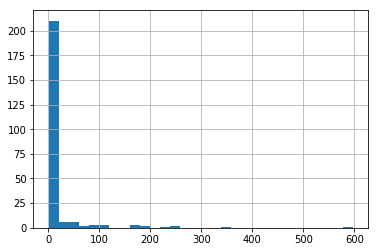

In [5]:
count_result = explory_cate_data(raw_user, 'live_city_id')
count_result['count'].hist(bins =30)

我们来用同样的方式对比一下线上测试集中应聘者的城市分布，可见前三个强城市：530，801，854三个的比例在训练集和测试集中比较相似，这三个可能是北上广？

Dtype of live_city_id is int16 and number of categoris is 86
Category of live_city_id are:
[530 531 538 541 551 565 566 567 569 570 571 572 573 574 575 576 587 588
 599 600 608 613 614 622 624 631 635 636 638 639 640 641 642 643 645 647
 653 657 658 664 665 677 681 682 702 703 704 707 708 714 719 720 721 723
 727 732 736 739 743 749 752 755 763 765 766 768 773 774 779 799 801 807
 808 811 813 822 824 831 854 857 858 864 868 873 886 899]
Count of every category
              count   perc
live_city_id              
530              64  0.128
801              36  0.072
854              35  0.070
538              33  0.066
765              26  0.052
763              26  0.052
531              23  0.046
736              23  0.046
719              17  0.034
565              15  0.030
551              13  0.026
702              12  0.024
599              11  0.022
635              10  0.020


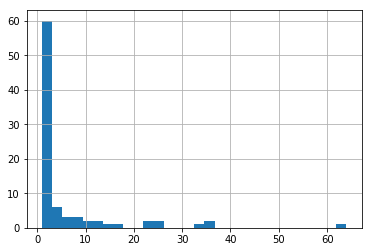

In [6]:
count_result = explory_cate_data(test_user, 'live_city_id')
count_result['count'].hist(bins =30)

###  2.1.2 desire_jd_city_id

由于给特征给了应聘者三个工作地备选项，因此，需要处理，将该特征一分为三。
对于手个desired job city , 只有极少空缺（10个以下），而第二个，第三个，在意料之中的，就有很多了。
在后面的处理中，我们会把 "-" 和 0均用np.nan替换，并且将其他的值的dtype改为np.int16。（由于我们可能用lgb/xgb所以，可能不对nan做过多处理）
显然，desire_jd_city_id可以和前面的live_city_id交叉构造几个特征：
desire_jd_city_id非nan数量，disire_jd_city_id_0/1/2是否和live_city_id 相同，类似的，更要看这几个city是否和job city相同。
另外，根据city本身的属性，可以将city划分为是否热门城市（即大城市或一线、准一线城市），构造相应特征，看能否得出有效信息。

In [7]:
tmp = raw_user['desire_jd_city_id'].str.split(',')
raw_user['desire_jd_city_id_0'] = tmp.apply(lambda x: x[0])
raw_user['desire_jd_city_id_1'] = tmp.apply(lambda x: x[1])
raw_user['desire_jd_city_id_2'] = tmp.apply(lambda x: x[2])

Dtype of desire_jd_city_id_0 is object and number of categoris is 197
Category of desire_jd_city_id_0 are:
['-' '0' '10169' '10185' '103147' '2025' '2566' '2576' '3773' '3809'
 '3927' '3947' '3987' '4367' '4421' '4432' '480' '489' '4974' '5013' '508'
 '5085' '512' '516' '517' '526' '530' '531' '532' '533' '534' '535' '536'
 '537' '538' '539' '540' '541' '542' '543' '544' '545' '546' '547' '548'
 '550' '551' '552' '553' '556' '557' '560' '565' '566' '567' '568' '569'
 '570' '571' '574' '575' '576' '577' '584' '585' '586' '587' '588' '590'
 '592' '596' '599' '600' '601' '606' '611' '612' '613' '614' '615' '617'
 '618' '619' '622' '627' '631' '635' '636' '637' '638' '639' '640' '641'
 '643' '644' '645' '646' '648' '653' '654' '655' '656' '657' '658' '659'
 '662' '664' '665' '672' '673' '674' '681' '682' '683' '685' '687' '688'
 '691' '694' '697' '701' '702' '703' '704' '707' '708' '709' '710' '711'
 '714' '715' '717' '718' '719' '720' '721' '722' '723' '724' '725' '726'
 '727' '731' '732'

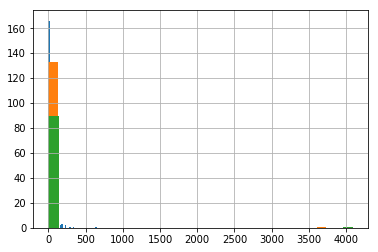

In [8]:
count_result = explory_cate_data(raw_user, 'desire_jd_city_id_0')
count_result['count'].hist(bins =30)
count_result = explory_cate_data(raw_user, 'desire_jd_city_id_1')
count_result['count'].hist(bins =30)
count_result = explory_cate_data(raw_user, 'desire_jd_city_id_2')
count_result['count'].hist(bins =30)

### 2.1.3 desire_jd_industry_id

应聘者选择的求职行业拆解后还是很多的（可能有很多是同一个或者近似行业的别称吧），共有1171个，后期行业关键次需要更加仔细的切分（用re的多关键词切分）

求职行业可以与职位行业相匹配，查看曝光行业是否为应聘者渴望行业；也可以与求职者的经验进行对比。当然，求职者渴望的行业数量，也是一个特征。

复杂的特征有：求职者渴望的行业的分散程度，不同行业之间的近似度，并根据近似度，求求职者渴望行业与求职者经验行业与职位所在行业进行近似对比，以防止因为别称不同，将同一个或近似行业归位两个行业，但这样处理比较麻烦。

In [22]:
from collections import defaultdict
import re
import numpy as np
def show_cate_info(df, col_name, splitor='/'):
    null_num = np.sum((df[col_name].isnull()) | (df[col_name]==''))
    df = df.loc[df[col_name].notna()]
    print '缺失值数量为：%d' %(null_num)
    df[col_name+'_set'] = df[col_name].apply(lambda x: set(x.split(splitor)))
    df_dict = defaultdict(lambda: 0)
    for df_set in df[col_name + '_set']:
        for content in df_set:
            df_dict[content]  = df_dict[content] + 1
    df_pd = pd.DataFrame({'id': df_dict.keys(),  'count': df_dict.values()})
    df_pd.sort_values('count',  ascending=False, inplace=True)
    return set(df_pd['id']), df_pd

In [10]:
user_desire_indu_set, df_pd=show_cate_info(raw_user, 'desire_jd_industry_id')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 



缺失值数量为：0
共有 1171 种，其中，最多的30种，见下方表格


,count,id
973,2445,建材
455,2445,建筑
1079,1832,房地产
409,1582,培训
393,1340,工程
621,880,教育
494,803,院校
230,389,影视
519,389,出版
1031,353,法律


###  2.1.4 desire_jd_type_id

工作岗位思路同行业，不做过多赘述。工作岗位数量更多。

In [11]:
user_desire_type_set, df_pd=show_cate_info(raw_user, 'desire_jd_type_id')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：0
共有 3185 种，其中，最多的30种，见下方表格


,count,id
2205,548,后勤
1359,429,助理
2682,339,建筑
3115,339,装修
2565,317,土木
2291,302,行政
766,237,审计
1795,227,秘书
105,218,主管
1936,216,文秘


###  2.1.5 desire_jd_salary_id

薪酬主要集中在4000-8000元区间，面议的也有很多，出乎意料（可能是很多人暂未想好要多少薪酬，故暂时以面议填充）。可以将desire salary 做一个从0-13的数值变量，面议的设为nan，因为面议缺失未能给出具体的salary信息。

salary本身数值，salary和job最大薪酬、最小薪酬的差值（转化为数值变量后）可直接作为特征；后续可以深入探究不同不同行业、不同职位之间的薪酬关系。

In [12]:
user_desire_salary_set, df_pd=show_cate_info(raw_user, 'desire_jd_salary_id')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd

缺失值数量为：0
共有 15 种，其中，最多的30种，见下方表格


,count,id
7,1392,0400106000
3,870,0600108000
6,592,0000000000
0,440,0800110000
12,430,0200104000
13,408,1000115000
4,244,1500125000
10,63,2500199999
9,24,3500150000
2,9,70001100000


###  2.1.6 cur_industry_id

In [13]:
user_cur_indu_set, df_pd=show_cate_info(raw_user, 'cur_industry_id')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：36
共有 125 种，其中，最多的30种，见下方表格


,count,id
41,1764,工程
85,1764,房地产
42,1764,建材
71,1764,建筑
20,869,教育
89,869,院校
95,869,培训
7,126,家居
91,126,装饰装潢
101,126,室内设计


###  2.1.7 cur_jd_type

In [14]:
user_cur_type_set, df_pd=show_cate_info(raw_user, 'cur_jd_type')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：1706
共有 293 种，其中，最多的30种，见下方表格


,count,id
194,437,装修
280,437,土木
186,437,建筑
78,437,市政工程
244,270,审计
168,270,税务
134,270,财务
50,225,后勤
163,225,行政
205,225,文秘


###  2.1.8 cur_salary_id

In [15]:
user_cur_salary_set, df_pd=show_cate_info(raw_user, 'cur_salary_id')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：0
共有 15 种，其中，最多的30种，见下方表格


,count,id
13,1316,0400106000
3,1040,0200104000
8,755,0600108000
14,439,1000115000
0,413,0800110000
4,234,1500125000
12,72,0000001000
11,67,2500199999
1,63,0100002000
10,33,3500150000


### 2.1.9 cur_degress_id

学历可以看作定序变量转化为int，但是MBA，EMBA可以等同于硕士吗，其他是作为缺失值，还是作为最低档？

In [16]:
user_cur_degress_set, df_pd=show_cate_info(raw_user, 'cur_degree_id')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：179
共有 11 种，其中，最多的30种，见下方表格


,count,id
10,2254,本科
8,1672,大专
1,138,硕士
5,106,高中
0,99,中专
4,16,MBA
9,12,其他
7,11,中技
3,6,EMBA
6,6,初中


###  2.1.10 birthday

由于赛题说生日是虚拟的，所以应该是主办方做了某种映射？但从年龄分布上看，这个结构还是很像真实情况的。0可以视为nan，75和60应该是填错了，可以视为outlier。

In [19]:
raw_user.groupby('birthday')['birthday'].count().sort_values(ascending=False)

birthday
24    1327
27     907
30     661
21     565
33     420
36     265
39     137
42      62
45      47
48      39
51      26
18      23
54      14
57       3
0        2
60       1
75       1
Name: birthday, dtype: int64

###  2.1.11 start_work_date

从工作经验来看，竟然有1966年的，那么年龄75岁好像也合理了。

工作经验中，缺失值是“-”，先将‘-’用-1代替，再将start_work_date数据类型转化为int，然后将-1转位np.nan

计算user至今工作经验，作为feature，同时，计算工作年限与job的工作经验需求（不知道会不会有大量缺失值）之间的差值作为另一个feature。

如果要深入探索的话，工作年限还可以和年龄做对比，以判断outlier。

In [20]:
raw_user.groupby('start_work_date')['start_work_date'].count().sort_values(ascending=False)

start_work_date
2017    554
2016    506
2015    473
2014    339
2018    316
2013    296
2012    258
2011    248
2010    213
2009    182
2008    172
-       153
2007    131
2006    131
2005    113
2004     70
2003     57
2002     48
2000     34
1999     29
2001     26
1997     20
1998     17
1996     16
1995     14
1990     12
1994     11
1989     10
1991      9
2019      7
1992      6
1987      6
1988      4
1983      4
1993      3
1985      3
1980      3
1986      2
1984      1
1982      1
1981      1
1966      1
Name: start_work_date, dtype: int64

### 2.1.12 experience

In [37]:
user_experience_set, df_pd=show_cate_info(raw_user, 'experience', '|')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：35
共有 6771 种，其中，最多的30种，见下方表格


,count,id
4039,1548,自我评价
589,1510,团队领导
989,1172,协助
2790,1139,客户
4749,1070,销售
1625,1050,处理
54,1031,互联网参考模型osi七层
6419,981,沟通
6682,972,组织
6369,962,协调


In [32]:
#查看user经验和渴望行业、渴望职位、现在行业、现在职位关键词交集的数量。
t = set.intersection(user_desire_indu_set, user_experience_set)
print "渴望行业与经验交集有 %d，交集展示如下" %len(t)
for i in t:
    print i,
print ''
print '-------------'    

t = set.intersection(user_desire_type_set, user_experience_set)
print "渴望职位与经验交集有 %d，交集展示如下" %len(t)
for i in t:
    print i,
print ''
print '-------------'    

t = set.intersection(user_cur_indu_set, user_experience_set)
print "渴望行业与经验交集有 %d，交集展示如下" %len(t)
for i in t:
    print i,
print ''
print '-------------'   

t = set.intersection(user_cur_type_set, user_experience_set)
print "渴望职位与经验交集有 %d，交集展示如下" %len(t)
for i in t:
    print i,


渴望行业与经验交集有 85，交集展示如下
机电设备 公关 生物工程 纺织 奢侈品 烟酒 护理 石化 保险 汽车 政府 旅游 酒店 信托 服务业 饮料 家居 造纸 电力 出版 能源 度假 认证 印刷 器械 电子技术 航空 石油 交通 休闲 影视 半导体 建材 检测 运输 物流 包装 通信 集成电路 体育 室内设计 美容 娱乐 建筑 学术 担保 商业中心 电气 采掘 拍卖 零售 仓储 矿产 工艺美术 科研 环保 工程 广告 餐饮 水利 典当 化工 物业管理 收藏品 检验 医疗设备 教育 法律 医药 保健 培训 家具 房地产 会展 贸易 礼品 进出口 玩具 皮革 媒体 银行 冶炼 院校 医疗 批发 
-------------
渴望职位与经验交集有 388，交集展示如下
销售代表 生产项目经理 事业单位 安全工程师 文字编辑 健身 律师 商务经理 教育产品开发 幼教 石油 高中教师 建筑工程师 医药代表 施工员 项目专员 助教 健康 编剧 销售行政专员 质量管理 检验 市场总监 电话销售 制图 知识产权 给排水 数据分析 仓库 演员 促销主管 会计助理 艺术指导 生产管理 销售总监 纺织 道路 地质勘查 客户咨询热线 机械维修 贸易专员 前厅接待 烹饪 文档 商超 市场策划 接待 美术设计 打字 办公室主任 卖场管理 店长 仓库经理 保险内勤 主管 项目管理 导购员 电子 管理 产品专员 体育老师 安全防护 企划专员 组稿 物流 临时 咨询 物业经理 广告文案策划 分析 电信 电气工程师 会展业务拓展 矿产 护士 普工 驾驶 项目主管 技术员 项目总监 保健 销售业务 市场专员 总工 信托 行政经理 采购经理 招聘专员 稽查 道具 项目协调 影视 美发 技工 三维 审计专员 投资管理 桥梁 食品 土建 银行会计 土木 运营主管 采购专员 秘书 文案策划 景观设计 校长 销售管理 隧道工程技术 展示 音乐教师 仪器仪表 营业员 咨询师 项目经理 证券 医院 副总裁 人力资源 总经理 房地产销售 合规 组长 高级管理 市场 招商经理 水利 风险管理 分销总监 期货 客户代表 测试员 柜员 操作 领班 咨询员 护理人员 纺织品 财务主管 环境科学 媒介策划 贸易经理 控制 副厂长 迎宾 总帐主管 采购 招商专员 后勤人员 总机 电脑操作 艺术 培训 化妆师 销售培训师 房地产开

##  2.2 raw_job

job数量有265690条，无重复

In [35]:
print 'raw_job表规模：%d条记录， %d个列' %(raw_job.shape[0], raw_job.shape[1])
print 'raw_job表中，唯一的job共有%d个' %(len(raw_job['jd_no'].unique()))

raw_job表规模：265690条记录， 18个列
raw_job表中，唯一的job共有265690个


###  2.2.1 jd_title

和求职者的意向交集比较少，看来需要做大量的文本处理，不然会缺失重要信息。从名称和交集数量上看，jd_title主要对应的求职人员的工作type而非industry

In [49]:
job_title_set, df_pd=show_cate_info(raw_job, 'jd_title')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
print '同工作type意向交集有%d' %(len(set.intersection(job_title_set, user_desire_type_set)))
print '同工作industry意向交集有%d' %(len(set.intersection(job_title_set, user_desire_indu_set)))
df_pd.head(30) 

缺失值数量为：0
共有 122551 种，其中，最多的30种，见下方表格
同工作type意向交集有387
同工作industry意向交集有44


,count,id
51414,5787,会计
83616,2763,出纳
88240,2479,人事专员
75322,2397,土建工程师
61416,2385,行政专员
101451,1593,项目经理
66947,1578,文员
37735,1529,总经理助理
2879,1488,施工员
96873,1466,行政助理


###  2.2.2 company_name

公司名称都是 ‘-’，均为缺失值，本列可以删除。

既然都是缺失值，主办方为什么要提供这个特征呢？

In [43]:
job_company_set, df_pd=show_cate_info(raw_job, 'company_name')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：0
共有 1 种，其中，最多的30种，见下方表格


,count,id
0,265690,-


###  2.2.3 city

工作城市共有393个，远超过应聘者居住城市与应聘者渴望工作城市数量。

In [45]:
raw_job_count_df =raw_job.groupby('city')['city'].count().sort_values(ascending=False)
print 'CIty 共有%d 个' %(raw_job_count_df.shape[0])
for i in raw_job_count_df.index:
    print i,
print ' '
print '前30的多的city为'：
raw_job

CIty 共有393 个
530 801 719 538 765 854 763 599 531 736 653 702 613 565 635 703 551 622 576 749 600 664 822 639 636 691 587 681 707 831 574 570 682 708 768 890 779 799 721 637 654 641 864 638 766 645 704 714 566 568 567 665 739 857 773 588 732 800 720 710 886 571 780 569 824 643 718 640 512 644 740 614 725 577 806 709 655 711 717 694 685 658 723 733 785 731 601 726 716 878 575 642 778 734 611 656 657 770 590 666 727 701 659 858 646 592 582 728 750 769 584 847 573 805 647 815 823 735 648 662 754 752 743 697 627 583 715 747 572 811 617 689 911 841 772 744 856 812 828 807 705 606 776 687 673 10197 602 933 729 674 677 585 813 615 609 722 826 804 607 712 675 706 623 767 480 771 517 688 699 579 608 840 745 860 810 894 802 818 751 830 508 825 829 690 758 755 593 746 596 859 862 668 730 775 526 605 650 669 660 652 808 809 930 604 713 501 10183 777 759 868 631 698 671 787 748 724 683 861 591 742 700 619 612 843 918 516 10186 827 610 529 561 10153 816 817 678 737 783 814 500 915 513 633 629 762 101

###  2.2.4 jd_sub_type

sub_type也是对应的求职人员的工作type，可以考虑将job的sub_type与job的title两个特征合并在一起。

\N为空值。


In [51]:
job_sub_type_set, df_pd=show_cate_info(raw_job, 'jd_sub_type')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
print '同工作type意向交集有%d' %(len(set.intersection(job_sub_type_set, user_desire_type_set)))
print '同工作industry意向交集有%d' %(len(set.intersection(job_sub_type_set, user_desire_indu_set)))
print '同工作sub_type 与工作的tile交集有%d' %(len(set.intersection(job_sub_type_set, job_title_set)))
df_pd.head(30) 

缺失值数量为：0
共有 1023 种，其中，最多的30种，见下方表格
同工作type意向交集有392
同工作industry意向交集有12
同工作sub_type 与工作的tile交集有610


,count,id
255,43971,助理
796,35674,\N
130,17356,主管
686,10960,文员
113,10562,会计师
941,10562,会计
474,10482,行政专员
243,8920,秘书
511,8312,工程造价
617,8312,预结算


###  2.2.5 require_nums

每个职位招聘人数都不多，招聘5人以下的职位就占了22万多。

该特征没有空值。

本特征可以与job title或sub type 做交叉特征的，比如同类title工作中更有薪酬竞争力的工作可能要求更严格。但是，现在因为job title比较杂乱，暂不考虑这种复杂的信息提取。

In [78]:
raw_job_require_num_df =raw_job.groupby('require_nums')['require_nums'].count().sort_values(ascending=False)
print 'require_nums的值如下：'
print np.sort(raw_job['require_nums'].unique())
raw_job_require_num_df.head(50)


require_nums的值如下：
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  49  50  51  55  56  58  60
  61  66  67  68  69  70  75  77  79  80  84  86  88  90  93  99 100 101
 104 110 111 115 120 122 125 128 130 133 140 148 150 155 160 163 166 180
 190 199 200 211 220 280 283 290 299 300 350 367 378 399 400 499 500 600
 785 795 800 888 896 900 999]


require_nums
1      131256
2       40038
3       26252
5       24361
10      15324
4        6179
6        4521
20       4378
8        2433
30       1958
15       1913
999      1600
50       1118
100       627
7         552
12        486
9         282
40        182
11        181
18        175
25        156
200       153
16        130
99        127
60        106
13        104
500       100
19         84
896        73
35         67
120        58
80         50
22         48
300        47
14         40
21         36
17         33
150        31
33         28
800        28
28         27
39         20
23         18
36         17
24         16
785        16
26         16
29         15
70         13
90         12
Name: require_nums, dtype: int64

###  2.2.6 max_salary

max_salary 的值域从0-150000，中间有很多非整数，可以重新分组划分一下。

In [81]:
raw_job_max_salary_df =raw_job.groupby('max_salary')['max_salary'].count().sort_values(ascending=False)
for i in  np.sort(raw_job_max_salary_df.index):
    print i,
raw_job_max_salary_df



0 1000 1001 1100 1112 1400 1500 1600 1800 2000 2001 2010 2050 2100 2200 2300 2400 2500 2550 2600 2700 2800 2880 2900 2999 3000 3001 3090 3100 3150 3200 3300 3301 3400 3401 3500 3501 3600 3650 3680 3700 3750 3800 3850 3900 3999 4000 4001 4100 4150 4200 4250 4270 4300 4350 4400 4499 4500 4501 4580 4599 4600 4666 4700 4731 4750 4770 4800 4880 4900 4969 4999 5000 5001 5100 5150 5200 5300 5320 5380 5400 5420 5500 5510 5600 5700 5800 5833 5850 5900 5999 6000 6001 6050 6100 6150 6200 6250 6300 6350 6400 6450 6480 6500 6501 6502 6600 6640 6650 6666 6700 6750 6800 6802 6808 6850 6875 6900 6999 7000 7001 7006 7050 7100 7150 7156 7200 7250 7260 7280 7300 7350 7360 7400 7500 7502 7580 7600 7608 7650 7659 7673 7700 7750 7800 7850 7900 7999 8000 8001 8002 8100 8150 8151 8200 8300 8333 8400 8500 8505 8600 8650 8800 8900 8999 9000 9100 9150 9166 9200 9220 9300 9400 9500 9600 9800 9900 9998 9999 10000 10001 10002 10200 10500 10592 10600 10800 10833 10999 11000 11100 11300 11500 11600 11650 11666 11800 

max_salary
6000     58145
8000     48791
10000    34389
15000    29426
4000     16805
20000    15434
5000     10854
12000     8377
30000     7083
7000      6300
4500      2941
25000     2801
9000      2721
50000     2571
16000     1792
6500      1697
18000     1160
5500      1006
40000     1004
14000      956
3500       912
13000      844
11000      788
70000      732
3000       646
2000       616
7500       569
35000      561
8500       555
24000      330
         ...  
5320         1
5380         1
5420         1
5510         1
22300        1
5850         1
21111        1
6050         1
20900        1
6350         1
6480         1
68000        1
6501         1
6640         1
7260         1
6650         1
19998        1
6750         1
67000        1
6808         1
6850         1
6875         1
16200        1
7006         1
7050         1
7150         1
7156         1
18750        1
7250         1
9150         1
Name: max_salary, Length: 335, dtype: int64

###  2.2.7 min_salary

min salary 范围为0-149000，可以对比max_salary 和min_salary 差额占min的比例，考察两者间隔差异程度。

In [82]:
raw_job_min_salary_num_df =raw_job.groupby('min_salary')['min_salary'].count().sort_values(ascending=False)
for i in  np.sort(raw_job_min_salary_num_df.index):
    print i,
raw_job_min_salary_num_df

0 1000 1100 1111 1200 1300 1400 1500 1580 1600 1700 1780 1799 1800 1880 1900 2000 2001 2050 2100 2200 2300 2400 2450 2499 2500 2520 2550 2600 2620 2700 2800 2850 2870 2880 2900 2950 2999 3000 3001 3050 3070 3100 3150 3200 3299 3300 3333 3350 3380 3400 3450 3460 3480 3499 3500 3501 3510 3550 3560 3570 3599 3600 3650 3680 3700 3750 3800 3850 3860 3900 3930 3999 4000 4001 4050 4080 4100 4109 4166 4180 4200 4201 4240 4250 4280 4300 4350 4375 4400 4425 4450 4500 4501 4520 4550 4580 4600 4610 4700 4730 4750 4751 4800 4802 4850 4878 4900 4999 5000 5001 5100 5200 5201 5296 5300 5400 5450 5500 5502 5508 5600 5601 5602 5625 5700 5750 5800 5806 5809 5833 5900 5980 5999 6000 6001 6100 6200 6250 6267 6300 6369 6396 6400 6440 6500 6505 6550 6600 6650 6666 6667 6700 6800 6820 6900 6999 7000 7001 7150 7155 7200 7300 7400 7500 7600 7692 7700 7800 7999 8000 8001 8100 8150 8200 8300 8333 8400 8500 8501 8560 8600 8700 8750 8760 8800 8900 8950 9000 9001 9100 9166 9300 9375 9400 9450 9500 9550 9600 9700 980

min_salary
4001      48249
6001      35538
8001      22343
10001     22342
5000      15309
3000      14326
2001      12450
4000      12440
6000      11760
8000      11335
15001      9838
10000      7272
3500       5273
20001      4833
15000      4383
7000       4025
4500       3298
30001      2132
20000      1925
12000      1841
2500       1439
5500       1040
9000        822
2000        817
25000       812
6500        757
50001       706
1000        615
13000       505
8500        493
          ...  
5806          1
5508          1
7150          1
4450          1
4425          1
7155          1
11111         1
10950         1
3570          1
5601          1
10600         1
9700          1
3680          1
9400          1
9375          1
3850          1
3860          1
3930          1
9001          1
8760          1
8560          1
8501          1
4109          1
4180          1
8150          1
4201          1
4240          1
4280          1
4375          1
149000        1
Name: min_sal

###  2.2.8 start_date

start_data 中 \N 为缺失值。
start_date 和 end_date 包含了什么信息呢？是不是越靠前的日期越可能已经完成招聘，应聘者delivery和HR satisfy的可能性越低？
可以转换为datetime，计算距今间隔多少日。

In [83]:
raw_job_start_date_num_df =raw_job.groupby('start_date')['start_date'].count().sort_values(ascending=False)
for i in  np.sort(raw_job_start_date_num_df.index):
    print i,
raw_job_start_date_num_df

20170808 20171116 20180301 20180302 20180305 20180306 20180307 20180308 20180309 20180310 20180312 20180313 20180314 20180315 20180316 20180319 20180320 20180321 20180322 20180323 20180324 20180325 20180326 20180327 20180328 20180329 20180330 20180331 20180401 20180402 20180403 20180404 20180405 20180407 20180408 20180409 20180410 20180411 20180412 20180413 20180414 20180415 20180416 20180417 20180418 20180419 20180420 20180421 20180422 20180423 20180424 20180425 20180426 20180427 20180428 20180430 20180501 20180502 20180503 20180504 20180505 20180506 20180507 20180508 20180509 20180510 20180511 20180512 20180513 20180514 20180515 20180516 20180517 20180518 20180519 20180520 20180521 20180522 20180523 20180524 20180525 20180526 20180527 20180528 20180529 20180530 20180531 20180601 20180602 20180603 20180604 20180605 20180606 20180607 20180608 20180609 20180610 20180611 20180612 20180613 20180614 20180615 20180616 20180617 20180618 20180619 20180620 20180621 20180622 20180623 20180624 2

start_date
20190325    29883
20190311    12806
20190318     9489
20190304     8905
20190320     8374
20190312     8273
20190305     7702
20190306     7539
20190307     7476
20190313     7444
20190322     7085
20190321     6922
20190308     6513
20190301     6364
20190319     6340
20190228     6283
20190314     6153
20190227     5937
20190225     5356
20190226     5352
20190315     5235
20190218     4771
20190220     4412
20190221     4355
20190213     3844
20190212     3819
20190219     3787
20190222     3765
20190214     3692
20190215     3391
            ...  
20180312        5
20180618        5
20180501        5
20180305        4
20180308        4
20180609        4
20181003        4
20180310        3
20180909        3
20180916        3
20180616        3
20180324        3
20180527        3
20181002        3
20180301        2
20180302        2
20180422        2
20180421        2
20180513        2
20180415        2
20180519        2
20180405        2
20180520        2
20180701        2

###  2.2.9 end_date


In [84]:
raw_job_end_date_num_df =raw_job.groupby('end_date')['end_date'].count().sort_values(ascending=False)
for i in  np.sort(raw_job_end_date_num_df.index):
    print i,
raw_job_end_date_num_df

20180325 20180329 20180418 20180424 20180528 20180530 20180611 20180614 20180708 20180710 20180714 20180715 20180720 20180723 20180724 20180804 20180805 20180807 20180808 20180812 20180813 20180817 20180827 20180828 20180829 20180831 20180903 20180910 20180914 20180915 20180916 20180917 20180920 20180921 20180922 20181014 20181015 20181016 20181021 20181024 20181027 20181029 20181030 20181031 20181101 20181104 20181106 20181109 20181114 20181118 20181119 20181121 20181123 20181125 20181126 20181128 20181203 20181204 20181205 20181210 20181211 20181212 20181213 20181214 20181216 20181218 20181223 20181224 20181225 20181226 20181227 20181229 20181231 20190101 20190105 20190108 20190109 20190110 20190113 20190115 20190117 20190119 20190121 20190122 20190124 20190125 20190126 20190128 20190129 20190130 20190206 20190207 20190208 20190210 20190211 20190214 20190215 20190216 20190217 20190218 20190219 20190220 20190221 20190222 20190223 20190224 20190225 20190226 20190227 20190228 20190301 2

end_date
20190424    23624
20190410     9929
20190420     9505
20190417     8747
20190421     8308
20190413     7764
20190414     6339
20190411     5946
20190418     5516
20190419     5362
20190412     5333
20190422     4963
20190406     4873
20190403     4554
20190407     4501
20190405     4294
20190415     4247
20190404     4212
20190423     3951
20190330     3813
20190327     3800
20190504     3758
20190323     3429
20190331     3405
20190329     3402
20190416     3399
20190328     3384
20190408     3315
20190409     3314
20190427     3010
            ...  
20201206        1
20200919        1
20200917        1
20200323        1
20190130        1
20190125        1
20181123        1
20190124        1
20181125        1
20181128        1
20181203        1
20181205        1
20181210        1
20181211        1
20181212        1
20181213        1
20181216        1
20181218        1
20181223        1
20181231        1
20190101        1
20190105        1
20190108        1
20190109        1
2

### 2.2.10 is_travel

2是什么意思，是缺失吗？如果不考虑，直接[0,1,2]作为特征

In [88]:
raw_job_is_travel_num_df =raw_job.groupby('is_travel')['is_travel'].count().sort_values(ascending=False)
for i in  np.sort(raw_job_is_travel_num_df.index):
    print i,
raw_job_is_travel_num_df


0 1 2

is_travel
0    166782
1     97640
2      1268
Name: is_travel, dtype: int64

###  2.2.11 min_years

显然，这是一个需要和应聘者工作时间像对比的，做差，看距离。

而将该特征本身作为定序变量。


In [89]:
raw_job_min_years_num_df =raw_job.groupby('min_years')['min_years'].count().sort_values(ascending=False)
for i in  np.sort(raw_job_min_years_num_df.index):
    print i,
raw_job_min_years_num_df


-1 0 1 103 110 199 299 305 399 510 599 1099

min_years
-1       93693
 103     75527
 305     50505
 510     29845
 1099     5498
 1        5430
 0        5161
 399        26
 599         2
 299         1
 199         1
 110         1
Name: min_years, dtype: int64

###  2.2.12 key

显然key主要以缺失值为主。
而且key的描述类似于应聘者的type

In [91]:
print 'key contains nan %d in all %d record' %(np.sum(raw_job['key'].isnull()), raw_job['key'].shape[0])


key contains nan 262634 in all 265690 record


In [93]:
raw_job_key_set, df_pd=show_cate_info(raw_job, 'key','|')
print '共有 %d 种，其中，最多的30种，见下方表格' % df_pd.shape[0]
df_pd.head(30) 

缺失值数量为：262634
共有 2782 种，其中，最多的30种，见下方表格


,count,id
2233,637,销售
1387,252,销售代表
2690,161,课程顾问
1381,142,客服
1340,135,会计
2765,110,业务
1819,97,财务
2013,95,行政
1173,89,助理
2570,85,文员


### 2.2.13 min_edu_level
学历要求中没有MBA、EMBA，这两个学历处理需要根据学校确定，但现在没有学校信息。。。

In [98]:
raw_min_edu_df =raw_job.groupby('min_edu_level')['min_edu_level'].count().sort_values(ascending=False)
for i in  np.sort(raw_min_edu_df.index):
    print i,
raw_min_edu_df

\N 中专 中技  初中  博士  大专  本科 硕士  请选择 高中 

min_edu_level
大专     128135
本科      83313
\N      38126
中专      11938
硕士       1503
中技       1404
高中       1259
博士         10
请选择         1
初中          1
Name: min_edu_level, dtype: int64

###  2.2.14 max_edu_level

最高学历全是缺失值，可以删除了，默认学历无上限。

那只需要对比职位最低学历同应聘者学历的差异即可。

可用{0,1}变量，或者转化为定序变量，计算差异

In [97]:
raw_max_edu_df =raw_job.groupby('max_edu_level')['max_edu_level'].count().sort_values(ascending=False)
for i in  np.sort(raw_max_edu_df.index):
    print i,
raw_max_edu_df

\N

max_edu_level
\N    265690
Name: max_edu_level, dtype: int64

###  2.2.15 is_mangerial

这也是一个可以直接删除的特征。。。


In [99]:
raw_is_mangerial_df =raw_job.groupby('is_mangerial')['is_mangerial'].count().sort_values(ascending=False)
for i in  np.sort(raw_is_mangerial_df.index):
    print i,
raw_is_mangerial_df

\N

is_mangerial
\N    265690
Name: is_mangerial, dtype: int64

### 2.2.16 resume_language_required

删删删

In [100]:
raw_resume_language_required_df =raw_job.groupby('resume_language_required')['resume_language_required'].count().sort_values(ascending=False)
for i in  np.sort(raw_resume_language_required_df.index):
    print i,
raw_resume_language_required_df

\N

resume_language_required
\N    4961
Name: resume_language_required, dtype: int64

### 2.2.17 job describle

该项内容需要语义分析，提取关键词，暂时不考虑。

In [101]:
raw_job['job_description'].head(30)

0     岗位职责：1、全面负责景观项目的概念设计和方案设计、扩初设计和施工图设计的工作，同时对方案文...
1     1、能够独立完成工程概、预、结算的编制及审核工作；2、熟悉重庆地区相关计价原则及计价文件；3...
2     岗位职责：1、负责整车销售服务和进店客户咨询服务；2、负责整理各车型的销售资料及客户档案；3...
3     高薪线上推广专员（可接受优秀应届毕业生）岗位职责：1、为客户提供快速、准确与专业的咨询及服务...
4     岗位职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...
5     工程预算员岗位职责：1、能够独立完成土建专业施工预算、现场签证、技术措施费、洽商工程量、工程...
6     职位描述1、协助上级做好招聘工作。2、对面试者进行电话邀约；3、员工入职离职手续的办理。4、...
7     岗位职责：1、处理部门事务，组织安排会议、整理会议记录等；2、协助部门整理文件资料、制作PP...
8     【职位优势】1、工作时间：早九晚六、周末双休；2、办公方便：昌平区天通苑（紧邻地铁5号线天通...
9     1、负责资料数据等的录入、复核；2、负责档案打印及装订；3、上级安排的其他工作。任职要求：1...
10    岗位职责：1、接待来访医美客户及线上咨询2、负责为高端顾客提供专业的咨询和美容设计服务，讲解...
11    岗位职责：1、按照有关政策法规办理开发项目所需的各种行政许可、证照、批文；2、完善工程有关建...
12    职位描述：负责前台的接待；辅助员工入职与离职的办理；负责公司快递，信件的发放；负责审核单子，...
13    1.负责公司项目清单报价，或定额报价，确保报价精准2.熟练掌握各类专业技术软件，与图纸软件1...
14    【岗位职责】1.了解公司运营情况状况，协助上级对公司运作与各部门工作进行管理、协调；2.协助...
15    1.确保项目目标实现，保证业主满意这一项基本职责是检查和衡量项目经理管理成败、水平高低的基本...
16    岗位职责：1、制作公司每月的工资报表，按时发放工资;2、薪酬数据分析及统计等工作，按时完成人...
17    岗位职责：1、负责平台店铺客户服务工作，处理日常的售前售后问题；2、协助同事完成公司